
## KAGGLE Titanic: Machine Leaning Competition
## Marta Wasko




In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [291]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
train_data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [293]:
train_data.shape


(891, 12)

### Exploring Data

In [279]:
survived    = train_data[train_data['Survived']==1]
no_survived = train_data[train_data['Survived']==0]

print("Total =", len(train_data))

print("Number of Survived passengers =", len(survived))
print("Percentage Survived =", 1.*len(survived)/len(train_data)*100.0, "%")
 
print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(train_data)*100.0, "%")
 


Total = 891
Number of Survived passengers = 342
Percentage Survived = 38.38383838383838 %
Did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


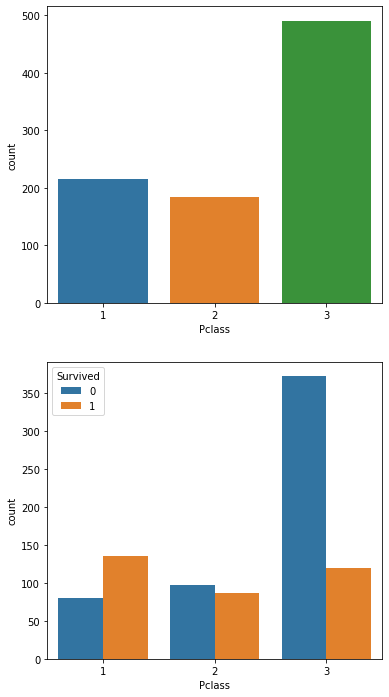

In [280]:
# Bar Chart to indicate the number of people survived based on their class

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = train_data)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data=train_data);

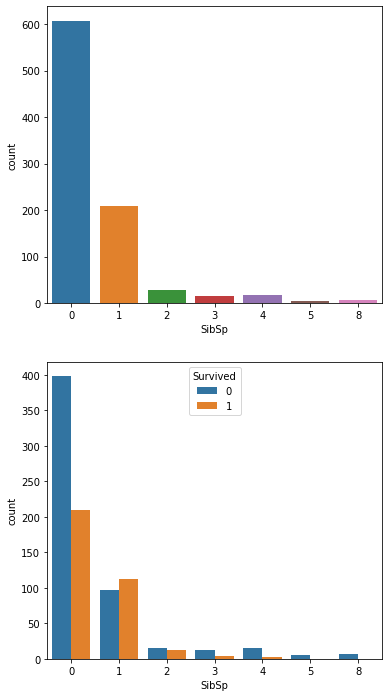

In [281]:
# Bar Chart to indicate the number of people survived based on their siblings status

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=train_data)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=train_data);

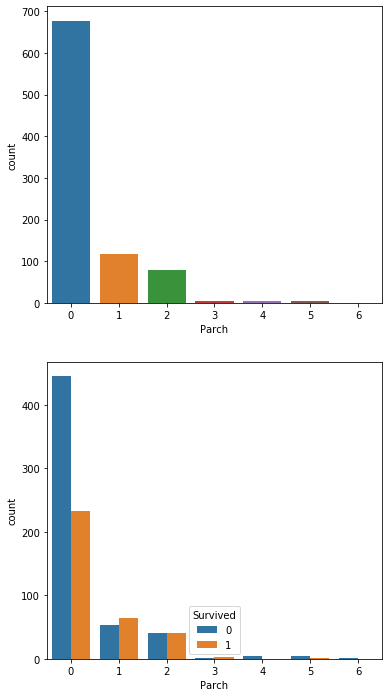

In [282]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents/children onboard)

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data=train_data)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=train_data);

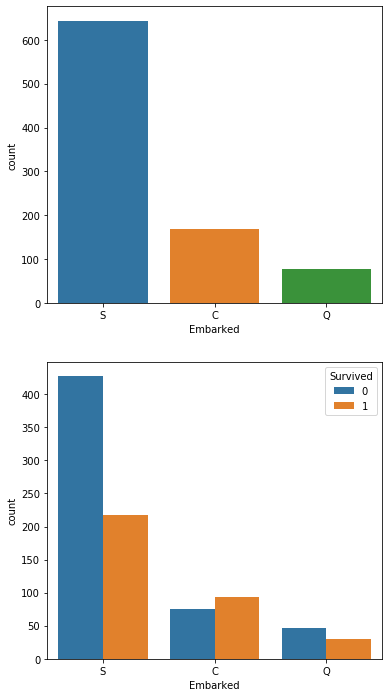

In [283]:
# Bar Chart to indicate the number of people survived based on the port they emparked from

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data=train_data)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data=train_data);

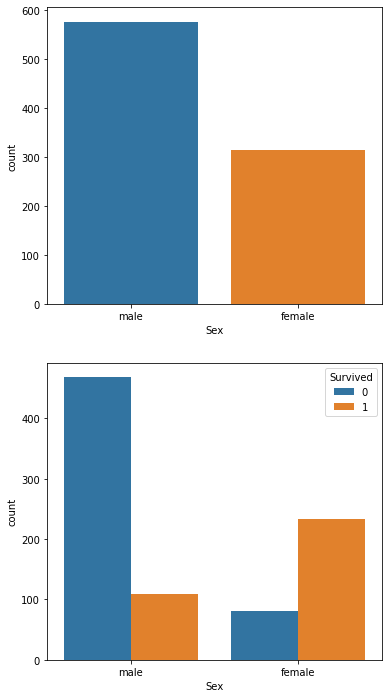

In [284]:
# Bar Chart to indicate the number of people survived based on their sex

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data=train_data)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data=train_data);

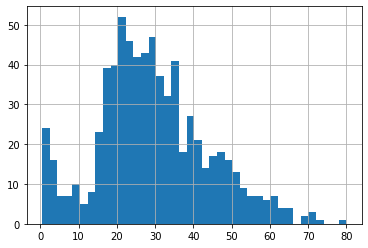

In [285]:
# Age Histogram 
train_data['Age'].hist(bins = 40);

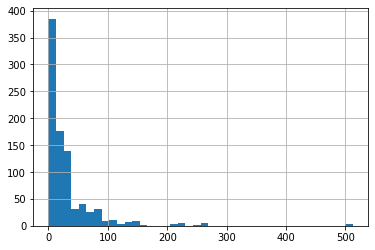

In [286]:
# Fare Histogram 
train_data['Fare'].hist(bins = 40);

## Data Cleaning

In [294]:
# dropping the cabin coloumn 

train_data.drop('Cabin',axis=1,inplace=True)

In [295]:
# dropping the embarked 
train_data.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

In [296]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


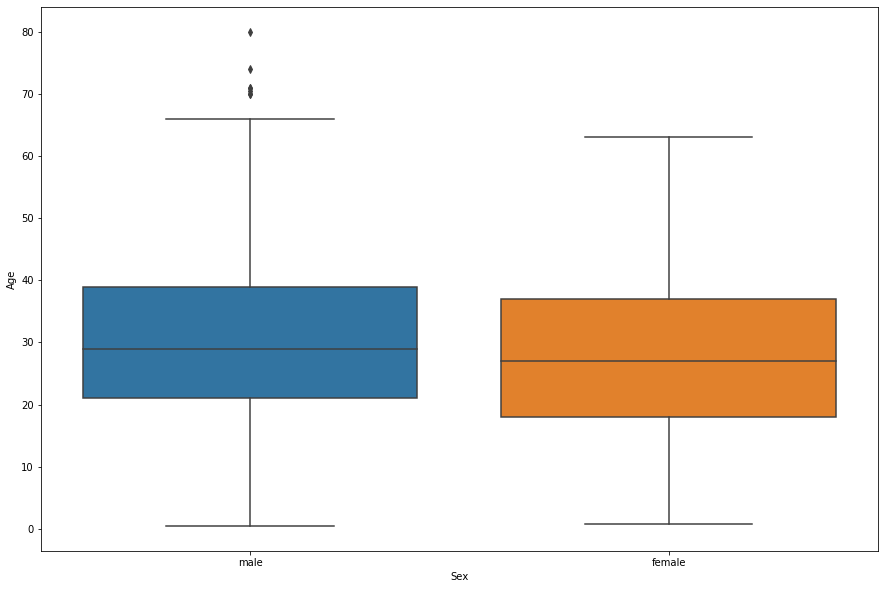

In [298]:
# checking the average age for male and female
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=train_data)

### Using the code provided in the Kaggle's tutorial to see if the score improved 

In [301]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
